In [1]:
import xarray as xr
from pathlib import Path
from winter_year import WinterYear
winter_year=WinterYear(2023,2024)
analyses_folder = "/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_3/analyses/completeness"
nasa_stats_name = f'WY_{winter_year.from_year}_{winter_year.to_year}_SNPP_nasa_l3_class_distribution.nc'
meteofrance_stats_name = f'WY_{winter_year.from_year}_{winter_year.to_year}_SNPP_meteofrance_class_distribution.nc'

meteofrance_stats_path= Path(f"{time_series_folder}").joinpath(meteofrance_stats_name)
nasa_stats_path= Path(f"{time_series_folder}").joinpath(nasa_stats_name)

meteofrance_ds = xr.open_dataset(meteofrance_stats_path)
nasa_ds = xr.open_dataset(nasa_stats_path)

NameError: name 'time_series_folder' is not defined

In [60]:
xr.open_dataset(f"{analyses_folder}/{name}").coords['class_name']

<xarray.DataArray 'class_name' (class_name: 8)> Size: 608B
array(['snow_cover', 'no_snow', 'clouds', 'forest_without_snow',
       'forest_with_snow', 'water', 'nodata', 'fill'], dtype='<U19')
Coordinates:
  * class_name  (class_name) <U19 608B 'snow_cover' 'no_snow' ... 'fill'

In [8]:
import numpy as np
np.nansum(xr.open_dataset(f"{analyses_folder}/{name}").isel(time=1).data_vars['percentage'].values)

np.float64(91.64701142494278)

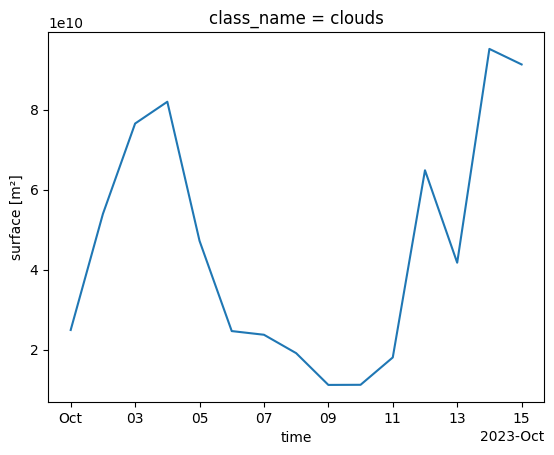

In [2]:
analyses_folder = "/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_3/analyses/completeness"
name = 'completeness_WY_2023_2024_SNPP_meteofrance_l3_res_375m'

xr.open_dataset(f"{analyses_folder}/{name}").data_vars['surface'].sel(class_name='clouds').plot()

In [7]:
ls /home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_3/

20231001.nc.aux.xml
20231003.nc
20231004.nc
20231005.nc
analyses/
WY_2023_2024_S2_res_1000m.nc
WY_2023_2024_S2_res_375m.nc
WY_2023_2024_S2_res_375m.nc.aux.xml
WY_2023_2024_SNPP_meteofrance_l3_res_1000m.nc
WY_2023_2024_SNPP_meteofrance_l3_res_375m.nc
WY_2023_2024_SNPP_meteofrance_res_1000m_test.nc
WY_2023_2024_SNPP_meteofrance_time_series.nc.aux.xml
WY_2023_2024_SNPP_meteofrance_time_series_res_1000m.nc.aux.xml
WY_2023_2024_SNPP_meteofrance_time_series_res_375m.nc.aux.xml
WY_2023_2024_SNPP_nasa_l3_res_1000m.nc
WY_2023_2024_SNPP_nasa_l3_res_375m.nc
WY_2023_2024_SNPP_nasa_l3_time_series_res_375m.nc.aux.xml
WY_2023_2024_SNPP_nasa_pseudo_l3_res_1000m.nc
WY_2023_2024_SNPP_nasa_pseudo_l3_res_375m.nc
WY_2023_2024_SNPP_nasa_pseudo_l3_time_series_res_1000m.nc.aux.xml
WY_2023_2024_SuomiNPP_nasa_time_series_res_1000m.nc.aux.xml
WY_2023_2024_SuomiNPP_nasa_time_series_res_375m.nc.aux.xml
WY_2024_2025_SuomiNPP_nasa_l3_time_series_res_375m.nc.aux.xml


In [43]:
import xarray as xr

ds=xr.open_dataset("/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_3/WY_2023_2024_SNPP_meteofrance_l3_res_1000m.nc", mask_and_scale=False)
ds.snow_cover_fraction.sel(time=slice(None,None))

array([[[254, 254, 254, ..., 254, 254, 254],
        [254, 254, 254, ..., 254, 254, 254],
        [254, 254, 254, ..., 254, 254, 254],
        ...,
        [254, 254, 254, ..., 254, 254, 254],
        [254, 254, 254, ..., 254, 254, 254],
        [254, 254, 254, ..., 254, 254, 254]],

       [[254, 254, 254, ..., 254, 254, 254],
        [254, 254, 254, ..., 254, 254, 254],
        [254, 254, 254, ..., 254, 254, 254],
        ...,
        [254, 254, 254, ..., 254, 254, 254],
        [254, 254, 254, ..., 254, 254, 254],
        [254, 254, 254, ..., 254, 254, 254]],

       [[254, 254, 254, ..., 254, 254, 254],
        [254, 254, 254, ..., 254, 254, 254],
        [254, 254, 254, ..., 254, 254, 254],
        ...,
        [254, 254, 254, ..., 254, 254, 254],
        [254, 254, 254, ..., 254, 254, 254],
        [254, 254, 254, ..., 254, 254, 254]],

       ...,

       [[254, 254, 254, ..., 254, 254, 254],
        [254, 254, 254, ..., 254, 254, 254],
        [254, 254, 254, ..., 254, 254, 254

In [32]:
from winter_year import Year
Year(0).month_dict[['january']]

TypeError: unhashable type: 'list'

In [3]:
from typing import List
from matplotlib.axes import Axes
import pandas as pd
import xarray as xr

def print_table( year_stats_data_array: xr.DataArray, classes_to_print: List[str] | str = "all"):
    year_data_frame = year_stats_data_array.to_pandas()
    pd.options.display.float_format = "{:.3f}".format
    pd.options.display.precision = 3
    if classes_to_print == "all":
        classes_to_print = year_stats_data_array.coords["class_name"].values
    print(year_data_frame)

def classes_bar_distribution(
    year_stats_data_array: xr.DataArray, classes_to_plot: List[str] | str = "all", ax: Axes | None = None
) -> None:
    year_data_frame = year_stats_data_array.to_pandas()
    if classes_to_plot == "all":
        classes_to_plot = year_data_frame.index

    year_data_frame = year_data_frame.transpose()
    year_data_frame.index = year_data_frame.index.strftime("%B")
    year_data_frame[classes_to_plot].plot.bar(ax=ax)

def plot_stacked(data1: pd.Series, data2: pd.Series, ax: Axes, label1: str='data1', label2: str='data2', bar_width: float=0.35, color1='tab:blue', color2='tab:orange'):

    # Bar width and x positions
    x = range(len(data1))

    # Plot stacked bar (sum of Column1 and Column2)
    ax.bar(x, data1, width=bar_width, label=label1, color=color1)
    ax.bar(x, data2, width=bar_width, bottom=data1, label=label2, color=color2)
    ax.set_xticks([i + bar_width / 2 for i in x])

def plot_separate_bar(data: pd.Series, ax: Axes, label:str='data', bar_width:float=0.35, color='tab:green'):
    x = range(len(data))
    # Plot separate bar (Column3)
    ax.bar([i + bar_width for i in x],data, width=bar_width, label=label,color=color)
    ax.set_xticks([i + bar_width / 2 for i in x])



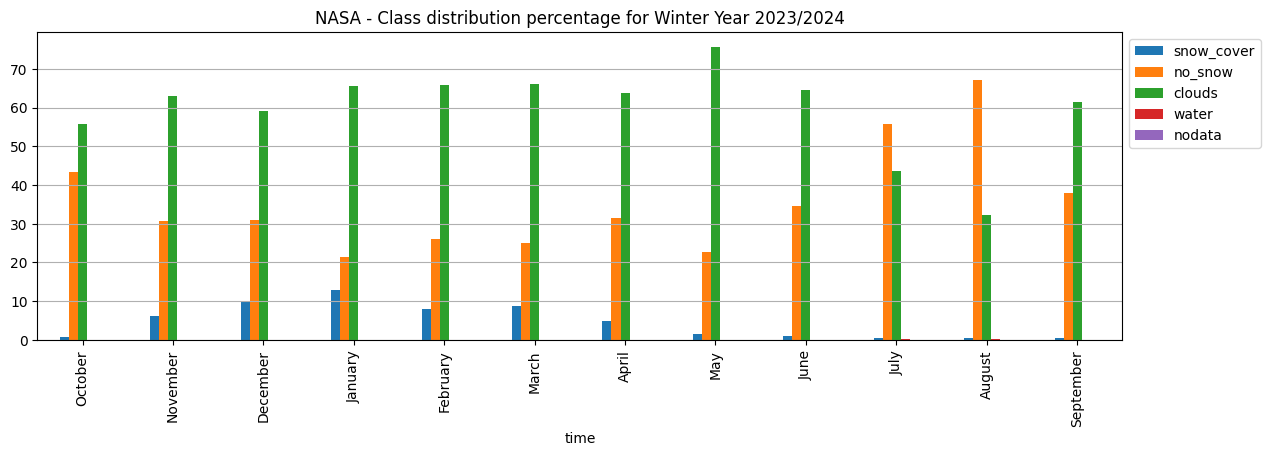

In [4]:
import matplotlib.pyplot as plt

fig,ax  = plt.subplots(figsize=(14,4))

ax.set_title(f"NASA - Class distribution percentage for {str(winter_year)}")
classes_bar_distribution(nasa_ds['class_distribution_percentage'],ax=ax)
ax.legend(bbox_to_anchor=(1, 1))
ax.grid(True, axis='y')

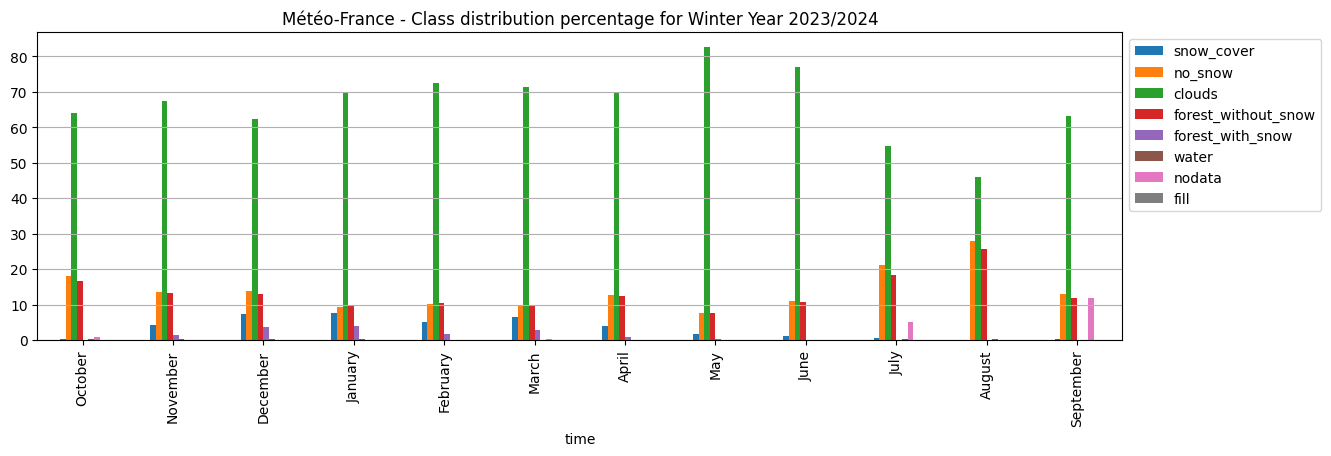

In [5]:
import matplotlib.pyplot as plt

fig,ax  = plt.subplots(figsize=(14,4))

ax.set_title(f"Météo-France - Class distribution percentage for {str(winter_year)}")
classes_bar_distribution(meteofrance_ds['class_distribution_percentage'],ax=ax)
ax.legend(bbox_to_anchor=(1, 1))
ax.grid(True, axis='y')

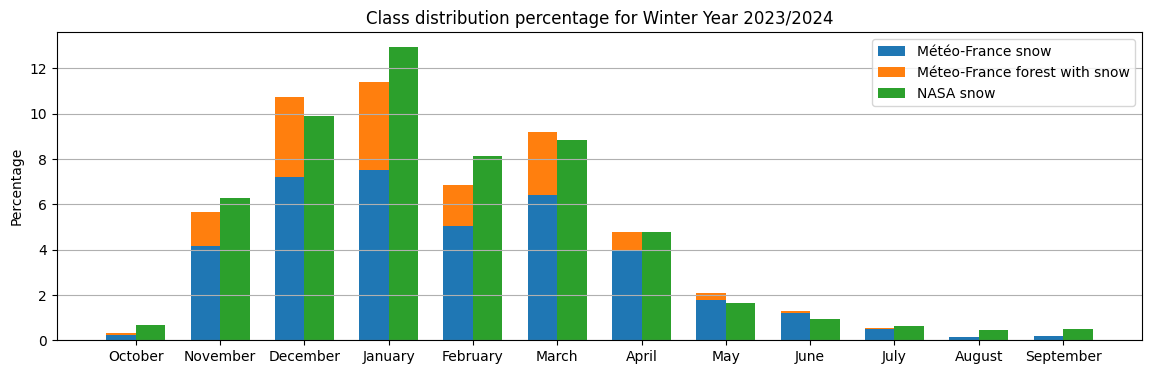

In [6]:
fig,ax  = plt.subplots(figsize=(14,4))
mf_snow = meteofrance_ds['class_distribution_percentage'].sel(class_name='snow_cover').to_pandas()
mf_forest_with_snow = meteofrance_ds['class_distribution_percentage'].sel(class_name='forest_with_snow').to_pandas()
nasa_snow = nasa_ds['class_distribution_percentage'].sel(class_name='snow_cover').to_pandas()

plot_stacked(mf_snow, mf_forest_with_snow, ax=ax,label1="Météo-France snow", label2="Méteo-France forest with snow")
plot_separate_bar(nasa_snow, ax=ax, label="NASA snow")
ax.set_xticklabels(mf_snow.index.strftime("%B"))
ax.set_ylabel('Percentage')
ax.grid(True,axis='y')
ax.legend()

plt.title(f'Class distribution percentage for {str(winter_year)}')
plt.show()

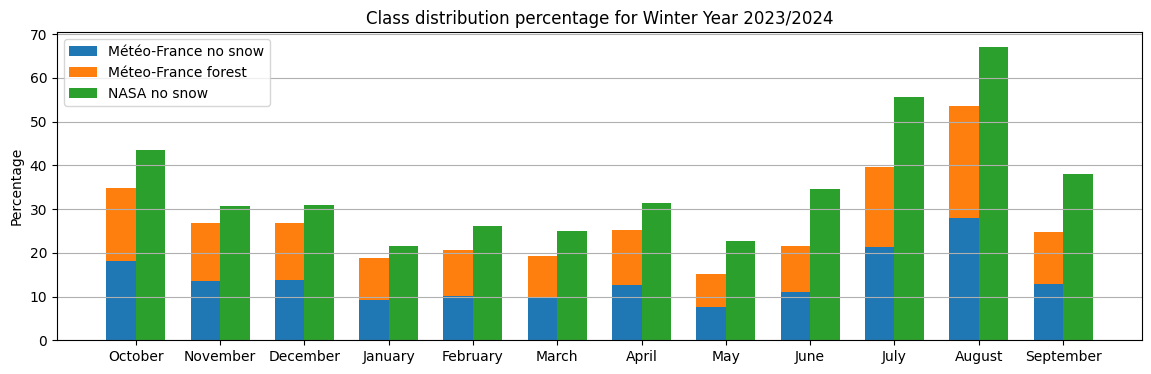

In [9]:
fig,ax  = plt.subplots(figsize=(14,4))
mf_no_snow = meteofrance_ds['class_distribution_percentage'].sel(class_name='no_snow').to_pandas()
mf_forest = meteofrance_ds['class_distribution_percentage'].sel(class_name='forest_without_snow').to_pandas()
nasa_no_snow = nasa_ds['class_distribution_percentage'].sel(class_name='no_snow').to_pandas()

plot_stacked(mf_no_snow, mf_forest, ax=ax,label1="Météo-France no snow", label2="Méteo-France forest")
plot_separate_bar(nasa_no_snow, ax=ax, label="NASA no snow")
ax.set_xticklabels(mf_no_snow.index.strftime("%B"))
ax.set_ylabel('Percentage')
ax.grid(True,axis='y')
ax.legend()

plt.title(f'Class distribution percentage for {str(winter_year)}')
plt.show()

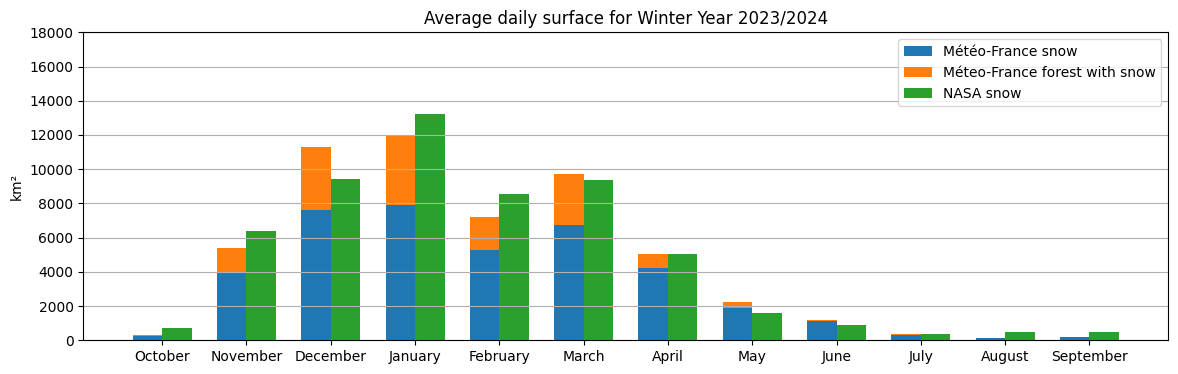

In [6]:
fig,ax  = plt.subplots(figsize=(14,4))
mf_snow = meteofrance_ds['class_distribution_area'].sel(class_name='snow_cover').to_pandas()*1e-6 / winter_year.days_per_month
mf_forest_with_snow = meteofrance_ds['class_distribution_area'].sel(class_name='forest_with_snow').to_pandas()*1e-6 / winter_year.days_per_month
nasa_snow = nasa_ds['class_distribution_area'].sel(class_name='snow_cover').to_pandas()*1e-6 / winter_year.days_per_month

plot_stacked(mf_snow, mf_forest_with_snow, ax=ax,label1="Météo-France snow", label2="Méteo-France forest with snow")
plot_separate_bar(nasa_snow, ax=ax, label="NASA snow")
ax.set_xticklabels(mf_snow.index.strftime("%B"))
ax.set_ylabel('km²')
ax.grid(True,axis='y')
ax.legend()
ax.set_ylim(0,18000)
plt.title(f'Average daily surface for {str(winter_year)}')
plt.show()

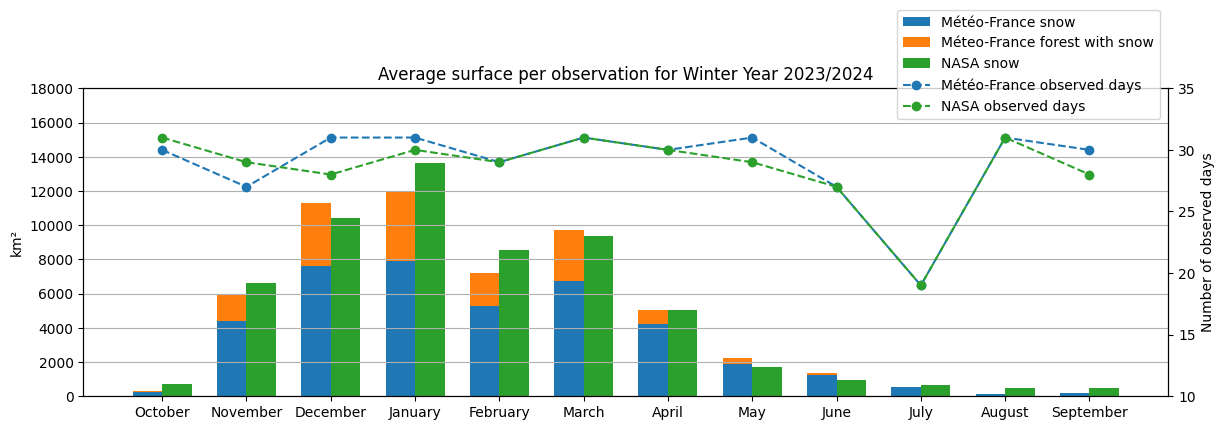

In [7]:
fig,ax  = plt.subplots(figsize=(14,4))
mf_snow = meteofrance_ds['class_distribution_area'].sel(class_name='snow_cover').to_pandas()*1e-6 / meteofrance_ds.data_vars['n_observed_days'].values
mf_forest_with_snow = meteofrance_ds['class_distribution_area'].sel(class_name='forest_with_snow').to_pandas()*1e-6  / meteofrance_ds.data_vars['n_observed_days'].values
nasa_snow = nasa_ds['class_distribution_area'].sel(class_name='snow_cover').to_pandas()*1e-6 / nasa_ds.data_vars['n_observed_days'].values

plot_stacked(mf_snow, mf_forest_with_snow, ax=ax,label1="Météo-France snow", label2="Méteo-France forest with snow", color1='tab:blue', color2='tab:orange')
plot_separate_bar(nasa_snow, ax=ax, label="NASA snow", color='tab:green')

ax.set_xticklabels(mf_snow.index.strftime("%B"))
ax.set_ylabel('km²')
ax.grid(True,axis='y')
ax.set_ylim(0,18000)


n_days_axis = ax.twinx()
n_days_axis.set_ylabel("Number of observed days")


n_days_axis.plot([i + 0.175 for i in range(12)], meteofrance_ds.data_vars['n_observed_days'], '--o', color='tab:blue', label='Météo-France observed days')
n_days_axis.plot([i + 0.175 for i in range(12)],nasa_ds.data_vars['n_observed_days'], '--o', color='tab:green', label='NASA observed days')
n_days_axis.set_xticks(ax.get_xticks())
n_days_axis.set_ylim(10, 35)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = n_days_axis.get_legend_handles_labels()
n_days_axis.legend(lines + lines2, labels + labels2, loc=(0.75,0.9))

plt.title(f'Average surface per observation for {str(winter_year)}')
plt.show()